In [1]:
import konlpy.tag
import re

In [2]:
# 파일 불러오기

keyword = input('키워드를 입력하세요 : ')

with open('insta_crawling_{}.txt'.format(keyword), 'r', encoding='utf-8') as f:
    content = f.read()
    
content[:500]

키워드를 입력하세요 : 익선동


'주말 역시 계획변경 먹방 마지막은 친스타그램 신나게놀고 오늘도 주말스타그램 가려다 일산 익선동 떡볶이 출근준비 먹스타그램\n아폴로 오늘도 익선동 flex 🚎☁️\n알라딘영화 이태리총각 오늘은 익선동맛집 한복대여 내가쏜다✌️ 그날그한복 경복궁나들이 마지막은 행복😍 주말스타그램 존쨈꿀쨈👍🏻😊😊😊 휴무그램😍😍 오늘\n다꾸 illustration 익선동카페 캐릭터 다이어리 혜화 아이패드그림 그림일기 낙원테산도 그림 스티커 일상 100days취향일기 일러스트레이터 그림스타그램 안뇽수비니에요 ipadpro 빈티지 procreate 디자인 일러스트 ootd illust daily 동묘 character artwork doodle 일러스트레이션\n아쉽다 ㅜㅜ 오랜만에 photo 일상 새벽까지 daily 창화당 selfie 다음엔 치킨 퍼플베리 한강 익선동\n파인애플게살볶음밥 골목숲카페 술도안먹는데 공사장배경은ng 쉬림프팟타이오믈렛 담부턴그냥 삼청동 밥집가쟈😂 애플망고쏨땀 종각 술패 익선동 살라댕방콕\n남매 '

In [4]:
# Text cleaning

filtered_content = re.sub(r'[^\d\s\w]',' ', content)  # 숫자, 공백, 문자가 아닌 모든 문자 ' '(공백)으로 대체

In [5]:
# 일부분만 일단 보기

print(filtered_content[:500])

주말 역시 계획변경 먹방 마지막은 친스타그램 신나게놀고 오늘도 주말스타그램 가려다 일산 익선동 떡볶이 출근준비 먹스타그램
아폴로 오늘도 익선동 flex    
알라딘영화 이태리총각 오늘은 익선동맛집 한복대여 내가쏜다   그날그한복 경복궁나들이 마지막은 행복  주말스타그램 존쨈꿀쨈      휴무그램   오늘
다꾸 illustration 익선동카페 캐릭터 다이어리 혜화 아이패드그림 그림일기 낙원테산도 그림 스티커 일상 100days취향일기 일러스트레이터 그림스타그램 안뇽수비니에요 ipadpro 빈티지 procreate 디자인 일러스트 ootd illust daily 동묘 character artwork doodle 일러스트레이션
아쉽다 ㅜㅜ 오랜만에 photo 일상 새벽까지 daily 창화당 selfie 다음엔 치킨 퍼플베리 한강 익선동
파인애플게살볶음밥 골목숲카페 술도안먹는데 공사장배경은ng 쉬림프팟타이오믈렛 담부턴그냥 삼청동 밥집가쟈  애플망고쏨땀 종각 술패 익선동 살라댕방콕
남매 


In [6]:
# Twitter has changed to Okt since 0.4.5
# 미등록 단어 사전에 추가 및 형태소 분리
from ckonlpy.tag import Twitter
twitter = Twitter()

twitter.add_dictionary([], 'Noun')  # 계속 추가 해나갈 것
twitter_morphs = twitter.pos(filtered_content)
print(twitter_morphs)

C:\Users\samsung\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
C:\Users\samsung\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_

In [7]:
# 품사별 list 만들기

Noun_words = []  # 명사만
for word, pos in twitter_morphs:
    if pos == 'Noun':
        Noun_words.append(word)
print(Noun_words)

#Adj_words = []  # 형용사만
#for word, pos in twitter_morphs:
#    if pos == 'Adjective':
#        Adj_words.append(word)
        
#Verb_words = []  # 동사만
#for word, pos in twitter_morphs:
#    if pos == 'Verb':
#        Verb_words.append(word)

['주말', '역시', '계획', '변경', '먹방', '마지막', '친', '스타', '그램', '오늘', '주말', '스타', '그램', '일산', '익선동', '떡볶이', '출근', '준비', '스타', '그램', '아폴로', '오늘', '익선동', '알라딘', '영화', '이태리', '총각', '오늘', '익선동', '맛집', '한복', '대여', '내', '쏜다', '그날', '그', '한복', '경복궁', '나들이', '마지막', '행복', '주말', '스타', '그램', '존', '꿀', '휴무', '그램', '오늘', '익선동', '카페', '캐릭터', '다이어리', '혜화', '아이패드', '그림', '그림', '일기', '낙원', '테', '산도', '그림', '스티커', '일상', '취향', '일기', '일러스트레이터', '그림', '스타', '그램', '안뇽', '수비', '빈티', '디자인', '일러스트', '동묘', '일러스트레이션', '오랜만', '일상', '새벽', '까지', '창', '당', '다음', '치킨', '퍼플', '베리', '한강', '익선동', '파인애플', '게살', '볶음밥', '골목', '숲', '카페', '술', '도안', '공', '사장', '배경', '쉬', '림프', '팟타이', '오믈렛', '담', '그냥', '삼청동', '밥집', '쟈', '애플', '망고', '쏨땀', '종각', '술패', '익선동', '살라', '댕', '방콕', '남매', '주말', '토요일', '퍼플', '베리', '아이스크림', '익선동', '육아', '입', '바닥', '나들이', '일상', '남매', '왜', '예감', '적', '익', '선고', '알루미늄', '프로파일', '키트', '키트', '다이어트', '조립', '식', '행거', '공간', '박스', '주말', '스타', '그램', '익선동', '카페', '스타', '그램', '커피', '스타', '그램', '버블티', '스타', '그램', '데이트', '익선동

In [10]:
# 불용어 제거를 위한 별도의 사전 (list 변수) 구축
# 길이가 2글자 이상인 것만 포함

stopwords = [keyword, '서울', '페럼', '팬싸', '러블', '리즈', '러블리즈', '진짜', '정예', '고수', 
            '서지수', '수정', '예성', '베이비소울', '유지애', '미주', '케이', '오늘', '국회', '행진',
            '필수', '선택', '최고', '가장', '절대', '기본', '팬싸인회', '부터', '다른', '자체', '사람',
            '까지', '어요', '어서', '유일하', '따라서', '시간', '위치', '지금', '그램', '스타', '인스타',
            '인스타그램', '맞팔', '선팔']  # 계속 추가할 것

unique_Noun_words = set(Noun_words)
for word in unique_Noun_words:
    if (word in stopwords) or (len(word)<2):
        while word in Noun_words: Noun_words.remove(word)
            
#unique_Adj_words = set(Adj_words)
#for word in unique_Adj_words:
#    if (word in stopwords) or (len(word)<2):
#        while word in Adj_words: Adj_words.remove(word)
                        
#unique_Verb_words = set(Verb_words)
#for word in unique_Verb_words:
#    if (word in stopwords) or (len(word)<2):
#        while word in Verb_words: Verb_words.remove(word)

In [13]:
import pandas as pd
from nltk import FreqDist

c = FreqDist(Noun_words)  # 명사 /형용사 /품사 추출
pd.set_option('display.max_rows', 100)
pd.DataFrame(c.most_common(100))  # 고빈도 n개만 추출

,0,1
0,맛집,6769
1,카페,5431
2,종로,2552
3,일상,1710
4,데이트,1462
5,을지로,1178
6,데일,1036
7,소통,771
8,여행,757
9,술집,629


In [2]:
# 전체 저장 dataframe 생성
import pandas as pd
import numpy as np

df = pd.DataFrame()
df

""


In [11]:
# 전체 과정
import konlpy.tag
import re
from ckonlpy.tag import Twitter
from nltk import FreqDist

dict_key = {}

for keyword in ['익선동', '을지로', '서촌']:
    with open('insta_crawling_{}.txt'.format(keyword), 'r', encoding='utf-8') as f:
        content = f.read()

    # Text cleaning
    filtered_content = re.sub(r'[^\d\s\w]',' ', content)  # 숫자, 공백, 문자가 아닌 모든 문자 ' '(공백)으로 대체

    # 미등록 단어 사전에 추가 및 형태소 분리
    twitter = Twitter()
    twitter.add_dictionary(['빈티지', '데일리'], 'Noun')  # 계속 추가 해나갈 것
    twitter_morphs = twitter.pos(filtered_content)

    Noun_words = []  # 명사만
    for word, pos in twitter_morphs:
        if pos == 'Noun':
            Noun_words.append(word)

    # 불용어 제거를 위한 별도의 사전 (list 변수) 구축
    stopwords = [keyword, '서울', '페럼', '팬싸', '러블', '리즈', '러블리즈', '진짜', '정예', '고수', 
                '서지수', '수정', '예성', '베이비소울', '유지애', '미주', '케이', '오늘', '국회', '행진',
                '필수', '선택', '최고', '가장', '절대', '기본', '팬싸인회', '부터', '다른', '자체', '사람',
                '까지', '어요', '어서', '유일하', '따라서', '시간', '위치', '지금', '메뉴', '젤라또', '다소',
                '면서', '하나',' 추천', '동네', '무조건', '그램', '스타', '인스타','인스타그램', '맞팔', 
                 '선팔']  # 계속 추가할 것

    # 길이가 2글자 이상인 것만 포함
    unique_Noun_words = set(Noun_words)
    for word in unique_Noun_words:
        if (word in stopwords) or (len(word) < 2):
            while word in Noun_words:
                Noun_words.remove(word)

    dict_key[keyword] = Noun_words
                
    #c = FreqDist(Noun_words)  # 명사 /형용사 /품사 추출
    #try:
    #    df[keyword] = c.most_common(100)  # 고빈도 n개만 추출
    #except:
    #    try:
    #        df[keyword] = c.most_common(50)
    #    except:
    #        df[keyword] = c.most_common(0)

C:\Users\samsung\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [7]:
pd.set_option('display.max_rows', 100)
display(df)
df.to_csv("insta_top100.csv", encoding='cp949', mode='w', index=False)

,익선동,을지로,서촌
0,"(맛집, 6769)","(맛집, 5712)","(카페, 3671)"
1,"(카페, 5431)","(카페, 2940)","(맛집, 3303)"
2,"(종로, 2552)","(빈티, 2504)","(경복궁, 2388)"
3,"(일상, 1710)","(일상, 1348)","(일상, 1359)"
4,"(데이트, 1462)","(지로, 1344)","(꽃집, 1345)"
5,"(을지로, 1178)","(종로, 1257)","(원피스, 1168)"
6,"(데일, 1036)","(호프, 1199)","(광화문, 1072)"
7,"(소통, 771)","(만선, 1133)","(플라워, 919)"
8,"(여행, 757)","(명동, 920)","(경복궁역, 915)"
9,"(술집, 629)","(데일, 919)","(종로, 870)"


키워드를 입력하세요 : 을지로


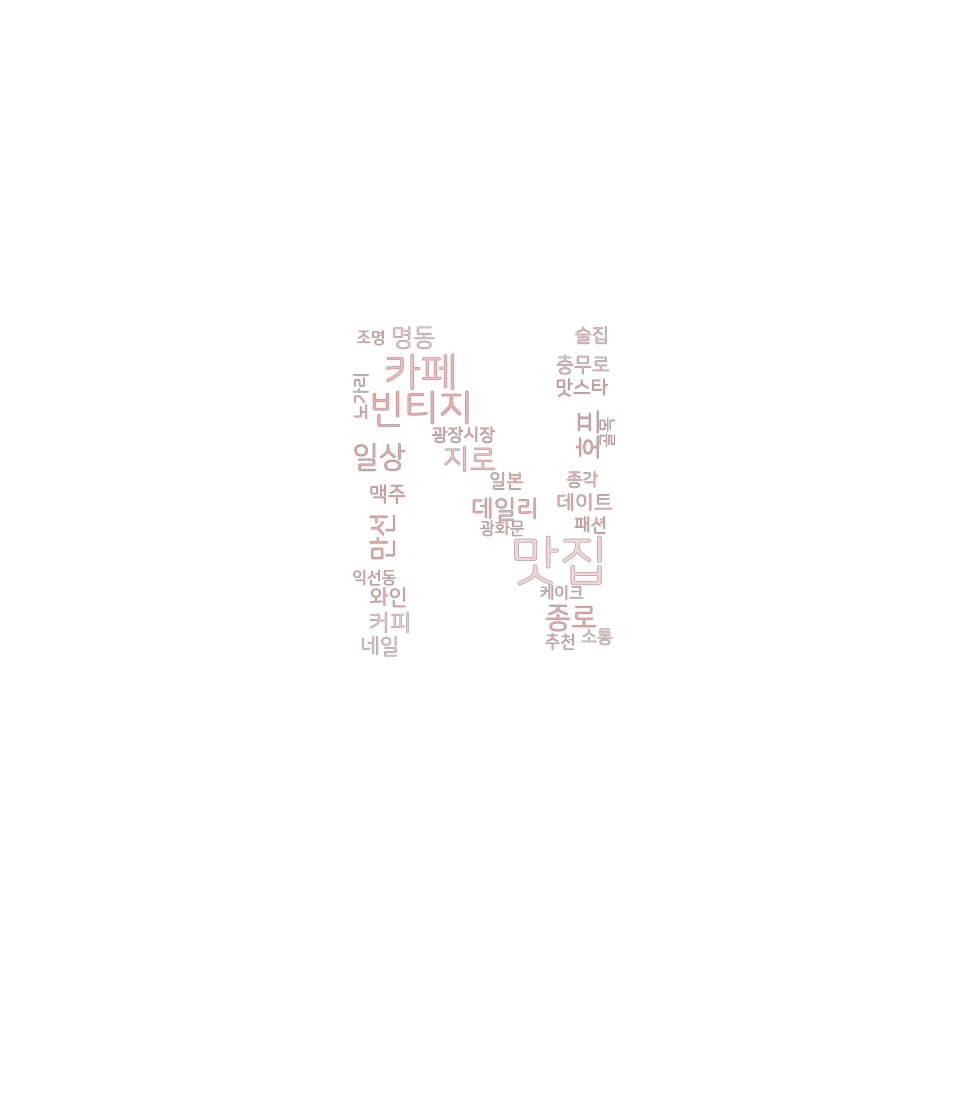

In [24]:
# wordcloud 생성
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

def color_func(word, font_size, position, orientation, random_state=None,
               **kwargs):
    return "hsl(0, %d%%, %d%%)" % (random.randint(70, 85), random.randint(80, 90))


keyword = input('키워드를 입력하세요 : ')

mask = np.array(Image.open('img2.png'))

# Transform your mask into a new one that will work with the function:
sns_mask = np.ndarray((mask.shape[0], mask.shape[1]), np.int32)

for i in range(len(mask)):
    sns_mask[i] = list(map(lambda x: 255 if x == 0 else x, mask[i]))

count = Counter(dict_key[keyword])
tags = count.most_common(30)

font_path = 'NanumSquareRoundR'

wc = WordCloud(font_path=font_path, background_color=None,
               mode='RGBA', mask=sns_mask)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(cloud.recolor(color_func=color_func, random_state=3),
           interpolation="bilinear")
# tags[:10]
plt.savefig('wordcloud_{}_top30.png'.format(keyword), bbox_inches='tight')

In [ ]:
# 토픽 모델링 할 때 사용
import konlpy.tag
import re
from ckonlpy.tag import Twitter
from nltk import FreqDist

keyword = input('키워드를 입력하세요 : ')

# 파일 csv로 변환
with open('tweets_crawling_{}.txt'.format(keyword), 'r', encoding='utf-8') as in_f,\
        open('tweets_crawling_{}.csv'.format(keyword), 'w', encoding='utf-8') as out_f:
    for line in in_f:
        out_f.write(line.replace('\t', ','))

text_df = pd.read_csv('tweets_crawling_{}.csv'.format(keyword), sep='delimiter',
                      header=None, encoding='utf8')

# 미등록 단어 사전에 추가
twitter = Twitter()

twitter.add_dictionary(['경일옥', '마제소바'], 'Noun')  # 계속 추가 해나갈 것

# Text cleaning
# 숫자, 공백, 문자가 아닌 모든 문자 ' '(공백)으로 대체
text_df['clean_doc'] = text_df[0].str.replace("[^\d\s\w]", " ")
text_df['clean_doc2'] = ''

# 자음 제거 + 명사 분리
for i in range(0, len(text_df['clean_doc'])):
    text_df['clean_doc2'][i] = ''
    for word, pos in twitter.pos(text_df['clean_doc'][i]):
        if (pos == 'Noun'):
            곡성['clean_doc2'][i] += (' ' + word)

# 길이가 2 이하인 단어는 제거 (길이가 짧은 단어 제거)
text_df['clean_doc2'] = text_df['clean_doc2'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

stopwords = [keyword, '서울', '페럼', '팬싸', '러블', '리즈', '러블리즈', '진짜', '정예', '고수',
             '서지수', '수정', '예성', '베이비소울', '유지애', '미주', '케이', '오늘', '국회', '행진',
             '필수', '선택', '최고', '가장', '절대', '기본', '팬싸인회', '부터', '다른', '자체', '사람',
             '까지', '어요', '어서', '유일하', '따라서', '시간', '위치', '지금']  # 계속 추가할 것

tokenized_doc = text_df['clean_doc2'].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])